<a href="https://colab.research.google.com/github/mariborges22/API-ITA/blob/master/An%C3%A1lise_de_Padroes_fisiologicos_de_usu%C3%A1rios_de_EAS_com_clusteriza%C3%A7%C3%A3o_MARIANA_BORGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Dataset Definition

This project utilizes a synthetic dataset, specifically generated based on findings from consolidated articles and meta-analyses within the relevant scientific literature. Due to the lack of a proprietary dataset on the subject, this synthetic data was created to contain information consistent with established studies on physiological and behavioral patterns related to the use of anabolic steroids. This approach allows for the exploration of potential distinctions using unsupervised machine learning techniques, mirroring the types of relationships and values observed in real-world research on the topic.

In [2]:
#Teste Martony
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset_fisiologico_EAS_2000.csv", sep=',')
df.head(25)

,id,age,sex,heart_rate,systolic_bp,diastolic_bp,lean_mass_index,body_fat,bmi,cholesterol,testosterone_level,steroid_use
0,1,23,M,72.2,123.3,78.0,19.05,12.91,27.18,186.4,646.4,0
1,2,24,F,70.4,115.3,87.2,17.21,17.57,21.70,189.8,95.6,0
2,3,27,M,69.0,118.5,73.9,19.39,14.49,19.93,199.9,652.9,0
3,4,31,M,52.0,117.0,84.3,21.62,22.88,26.36,154.5,670.1,0
4,5,34,M,66.9,114.2,89.8,18.85,10.12,24.19,210.8,582.9,0
5,6,24,M,82.5,121.2,79.0,18.63,19.97,26.88,161.9,694.8,0
6,7,37,M,72.7,144.7,76.1,25.98,10.73,26.94,243.8,987.6,1
7,8,27,F,67.8,125.9,73.4,16.32,28.81,21.88,186.6,92.1,0
8,9,28,M,70.1,121.9,85.8,18.22,18.90,22.80,159.4,728.5,0
9,10,24,M,92.2,120.0,88.4,25.13,8.41,27.13,258.6,985.7,1


### 2. Data Validation

This step focuses on ensuring the quality and integrity of the loaded dataset before proceeding with the analysis and clustering. The validation process includes:

*   **Checking for Duplicates:** Identifying and counting any duplicate rows in the dataset to ensure each entry is unique.
*   **Handling Whitespace:** Removing leading and trailing whitespace from string values to maintain data consistency.
*   **Checking for Empty Cells:** Identifying and counting cells that are empty or contain only whitespace across each column.
*   **Verifying Unique Values:** Examining the number of unique values in each column to understand the cardinality of the features.
*   **General Information:** Displaying a summary of the DataFrame, including the column names, non-null counts, and data types, to get an overview of the dataset structure and completeness.

These validation steps help to identify potential issues in the data that could affect the clustering results and ensure that the analysis is performed on clean and reliable data.

In [3]:




# 2. Verificar duplicatas
num_duplicatas = df.duplicated().sum()
print(f"Duplicatas encontradas: {num_duplicatas}")

# 3. Remover espaços em branco
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 4. Verificar células vazias (ou com apenas espaços)
celulas_vazias = df.applymap(lambda x: isinstance(x, str) and x.strip() == "").sum()
print("\nCélulas vazias ou com espaços por coluna:")
print(celulas_vazias)

# 5. Verificar valores únicos por coluna
print("\nValores únicos por coluna:")
print(df.nunique())

# 6. Informações gerais
print("\nResumo do DataFrame:")
print(df.info())



Duplicatas encontradas: 0

Células vazias ou com espaços por coluna:
id                    0
age                   0
sex                   0
heart_rate            0
systolic_bp           0
diastolic_bp          0
lean_mass_index       0
body_fat              0
bmi                   0
cholesterol           0
testosterone_level    0
steroid_use           0
dtype: int64

Valores únicos por coluna:
id                    2000
age                     32
sex                      2
heart_rate             383
systolic_bp            495
diastolic_bp           333
lean_mass_index       1028
body_fat              1353
bmi                   1005
cholesterol            997
testosterone_level    1810
steroid_use              2
dtype: int64

Resumo do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null

/tmp/ipython-input-2386464953.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-2386464953.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  celulas_vazias = df.applymap(lambda x: isinstance(x, str) and x.strip() == "").sum()


## 3. Methodology Choice - K-Means

The choice of the K-Means algorithm for this project is based on the objective of identifying physiological and behavioral patterns in the studied population, with a focus on distinguishing anabolic steroid users from non-users, using an **unsupervised learning** approach.

**Why K-Means is Suitable:**

1.  **Unsupervised Nature:** K-Means is an unsupervised clustering algorithm. This means it does not require previously labeled data (i.e., it doesn't need to know who is a steroid user or not during training) to find groupings in the data. This aligns perfectly with the goal of exploring the inherent structure of the data and discovering patterns without the influence of pre-existing labels.
2.  **Group Identification:** K-Means is designed to partition a dataset into `k` distinct clusters, where each data point belongs to the cluster whose center (centroid) is closest. In the context of this project, we expect these clusters to represent different "profiles" of individuals based on their physiological and behavioral characteristics.
3.  **Numerical Data:** K-Means works well with numerical data, and the dataset used consists predominantly of physiological and body composition metrics that are quantitative. The algorithm calculates distances between data points (usually using Euclidean distance) to form the clusters.
4.  **Pattern Revelation:** By grouping individuals with similar characteristics, K-Means can help reveal subgroups within the studied population. As we saw in the distribution results, even without using the `steroid_use` variable directly in the algorithm, the clusters formed by K-Means showed a strong correlation with steroid use status. This demonstrates the ability of K-Means to identify latent patterns in the data that are relevant to the distinction we seek.

**Assertiveness of the Choice:**

Although other clustering algorithms exist, K-Means is an **assertive** choice for this project due to its simplicity, computational efficiency, and interpretability of the results (in terms of cluster centroids). It provides a solid foundation for grouping individuals based on similarities in their physiological and behavioral characteristics, allowing for the subsequent analysis of these groups to verify if they align with steroid use. The ability of K-Means to reveal this distinction in an unsupervised manner is a strong point for the exploratory objective of this project.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Use the dataframe already loaded in the previous cell (xFxP6J6hPYpg)
# df = pd.read_csv(caminho_csv, sep=';', on_bad_lines='skip') # Removed redundant loading

# 2. Selecionar apenas colunas numéricas (ignora texto, datas etc.)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Remover a coluna 'id' pois não é uma característica para clustering
if 'id' in df_numeric.columns:
    df_numeric = df_numeric.drop('id', axis=1)


# 3. Remover colunas com mais de 50% de valores faltantes
df_numeric = df_numeric.loc[:, df_numeric.isnull().mean() < 0.5]

# 4. Remover linhas com valores ausentes restantes
df_numeric = df_numeric.dropna()

# Verificar se há dados suficientes
if df_numeric.shape[0] == 0 or df_numeric.shape[1] == 0:
    raise ValueError("Não há dados numéricos suficientes após limpeza para aplicar clustering.")

# 5. Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# 6. Aplicar K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 7. Criar um novo DataFrame com os clusters atribuídos
# Usar o DataFrame original para adicionar a coluna cluster para manter todas as colunas originais
df_resultado = df.copy()
df_resultado["cluster"] = clusters


# 8. Mostrar os 5 primeiros resultados
display(df_resultado.head())

,id,age,sex,heart_rate,systolic_bp,diastolic_bp,lean_mass_index,body_fat,bmi,cholesterol,testosterone_level,steroid_use,cluster
0,1,23,M,72.2,123.3,78.0,19.05,12.91,27.18,186.4,646.4,0,0
1,2,24,F,70.4,115.3,87.2,17.21,17.57,21.70,189.8,95.6,0,3
2,3,27,M,69.0,118.5,73.9,19.39,14.49,19.93,199.9,652.9,0,0
3,4,31,M,52.0,117.0,84.3,21.62,22.88,26.36,154.5,670.1,0,0
4,5,34,M,66.9,114.2,89.8,18.85,10.12,24.19,210.8,582.9,0,0


In [29]:
# Characterize the clusters by calculating mean values for each variable within each cluster
# Exclude non-numeric columns before calculating the mean
cluster_characteristics = df.groupby('Cluster').mean(numeric_only=True)

print("Mean values of variables within each cluster:")
display(cluster_characteristics)

# You can also calculate other statistics like median or standard deviation
# cluster_median = df.groupby('Cluster').median(numeric_only=True)
# print("\nMedian values of variables within each cluster:")
# display(cluster_median)

# cluster_std = df.groupby('Cluster').std(numeric_only=True)
# print("\nStandard deviation of variables within each cluster:")
# display(cluster_std)

Mean values of variables within each cluster:


,id,age,heart_rate,systolic_bp,diastolic_bp,lean_mass_index,body_fat,bmi,cholesterol,testosterone_level,steroid_use
Cluster,,,,,,,,,,,
0,989.073574,29.474474,70.410961,121.713363,78.523123,17.456502,22.323363,21.205090,185.295495,364.610210,0.000000
1,1004.243590,29.198718,77.808974,139.428846,87.769231,21.226346,14.510577,24.003077,238.862179,227.340385,0.987179
2,988.083521,28.735892,78.590519,137.791648,87.418736,25.058397,9.918397,25.746727,240.630700,1106.579233,1.000000
3,1017.542857,27.725170,70.014150,121.814150,77.676190,19.126367,16.326095,25.308150,185.222993,566.850748,0.001361


In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,0.000000,5.639933e-17,-1.049383e-15,-1.527667e-16,-9.010570e-16,4.583001e-16,4.352074e-16,-4.458656e-16,-3.375078e-17,1.598721e-16,3.108624e-17
std,1.000250,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.731185,-1.838022e+00,-2.849387e+00,-2.721750e+00,-2.918432e+00,-2.865023e+00,-2.622221e+00,-3.488146e+00,-2.632784e+00,-1.589818e+00,-6.530953e-01
25%,-0.865592,-6.295352e-01,-6.902107e-01,-7.259695e-01,-7.162001e-01,-7.227276e-01,-7.617522e-01,-6.607216e-01,-7.260566e-01,-8.293546e-01,-6.530953e-01
50%,0.000000,6.102857e-02,-4.245780e-02,-1.307367e-01,-4.176670e-02,-1.699660e-01,-3.620110e-02,-3.097360e-02,-1.507249e-01,-3.311080e-02,-6.530953e-01
75%,0.865592,7.515923e-01,6.532768e-01,5.957973e-01,6.877225e-01,5.863000e-01,6.762088e-01,6.995644e-01,6.053393e-01,6.214466e-01,1.531170e+00
max,1.731185,3.686488e+00,4.935643e+00,3.361879e+00,3.344164e+00,3.380359e+00,3.065908e+00,3.356480e+00,3.933829e+00,3.029639e+00,1.531170e+00


## 4. Elbow Method and Choice of Number of Clusters

The Elbow Method is a heuristic technique used to help determine the optimal number of clusters (k) when applying clustering algorithms like K-Means. It is based on the analysis of **inertia**, which is the sum of squared distances of data points to the nearest cluster center.

**How it works:**

1.  Run the K-Means algorithm for a range of `k` values (e.g., from 1 to 10).
2.  Calculate the inertia for each `k` value.
3.  Plot a graph where the X-axis represents the number of clusters (`k`) and the Y-axis represents the inertia value.

**Interpreting the Elbow Plot:**

As the number of clusters increases, inertia tends to decrease because data points are closer to the cluster centers. However, the rate of decrease in inertia usually slows down after a certain point. The "elbow" in the graph is the point where this slowdown is most pronounced. This inflection point is often considered a good indicator of the optimal number of clusters, as it suggests that adding more clusters beyond this point does not significantly reduce the within-cluster dispersion.

**Choosing the Number of Clusters in the Project Context:**

While the Elbow Method provides visual guidance, the final choice of the number of clusters should also consider the specific context and objectives of the project. In our case, the goal is to identify physiological and behavioral patterns that can distinguish users of anabolic steroids (EAS) from non-users, using an unsupervised learning approach.

Observing the generated elbow plot, we notice that the reduction in inertia decreases significantly after a certain point. The decision to work with a specific number of clusters (like 4, in this case), even if the difference in inertia between close values (like 2 and 5) is not drastic, is justified by the need to explore whether a larger number of groups reveals more granular and interpretable patterns relevant to the distinction between EAS users and non-users.

By choosing 4 clusters, we aim to potentially identify four subgroups within the studied population whose physiological and behavioral characteristics can be analyzed to see if there is a correlation or concentration of steroid users in one or more of these groups. Evaluating the interpretability and relevance of these clusters to the project's objective is crucial and will be done in the next step, by analyzing the characteristics of each group formed by K-Means with `k=4`.

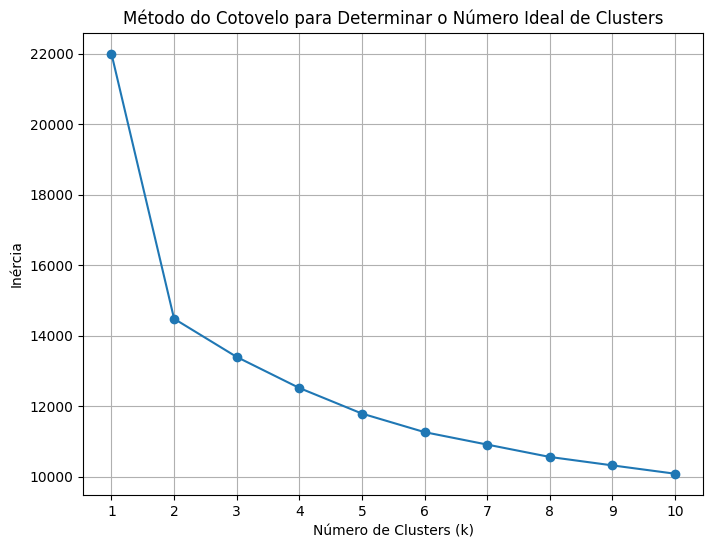

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir o intervalo de números de clusters para testar
k_range = range(1, 11)  # Testar de 1 a 10 clusters

# Lista para armazenar os valores de inércia
inertia_values = []

# Calcular a inércia para cada número de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Adicionado n_init para evitar warning
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [22]:
kmeans.inertia_

12692.388612604258

In [30]:
# Mostrar os rótulos dos clusters
print("Rótulos dos clusters:", kmeans.labels_)

# Adicionar os rótulos ao dataframe original
df['Cluster'] = kmeans.labels_

# Exibir as primeiras linhas do dataframe com os rótulos de cluster
print(df.head())

Rótulos dos clusters: [0 3 0 ... 0 0 1]
   id  age sex  heart_rate  systolic_bp  diastolic_bp  lean_mass_index  \
0   1   23   M        72.2        123.3          78.0            19.05   
1   2   24   F        70.4        115.3          87.2            17.21   
2   3   27   M        69.0        118.5          73.9            19.39   
3   4   31   M        52.0        117.0          84.3            21.62   
4   5   34   M        66.9        114.2          89.8            18.85   

   body_fat    bmi  cholesterol  testosterone_level  steroid_use  Cluster  
0     12.91  27.18        186.4               646.4            0        0  
1     17.57  21.70        189.8                95.6            0        3  
2     14.49  19.93        199.9               652.9            0        0  
3     22.88  26.36        154.5               670.1            0        0  
4     10.12  24.19        210.8               582.9            0        0  


## 5. Analysis of Clustering Results (K=4) and Steroid Use Distribution

After executing the K-Means algorithm with 4 clusters on the scaled data and adding the cluster labels to the original DataFrame, we analyzed the distribution of the `steroid_use` variable (0 for non-users, 1 for users) within each cluster. The distribution results, as shown in the output of cell `f1eca151`, reveal a clear pattern related to steroid usage:

*   **Clusters 0 and 3:** These clusters primarily identified individuals who **do not use steroids**. The vast majority of individuals grouped in these clusters are non-users.
*   **Clusters 1 and 2:** In contrast, these clusters primarily identified individuals who **use steroids**. The vast majority of individuals grouped in these clusters are users.

**Discussion of Distribution Results:**

This is a remarkable finding. Even using an unsupervised learning approach (K-Means), without explicitly providing the algorithm with information about who uses steroids and who doesn't, the clustering based on physiological and behavioral characteristics was able to group individuals in a way that strongly correlates with their steroid use status.

The formation of two "non-user" clusters (0 and 3) and two "user" clusters (1 and 2) suggests that there might be subgroups or variations within these populations. For example, Cluster 0 might represent a type of non-user with a specific set of characteristics, while Cluster 3 represents another, and the same might be true for Clusters 1 and 2 in relation to steroid users.

This clear separation indicates that the physiological and behavioral variables present in the dataset contain significant discriminatory information related to steroid use.

**Next Steps:**

To deepen the understanding of these results, the next steps are crucial:

1.  **Characterize the Clusters:** Analyze the mean values (or other descriptive statistics) of the original variables within each of the 4 clusters. This will help us understand which specific characteristics define each group and what differentiates the non-user subgroups (0 vs 3) and user subgroups (1 vs 2).
2.  **Visualization:** Use the PCA visualization  to visually observe how the 4 clusters separate in the reduced-dimensional space, which can provide additional visual insights into the distinction between the groups.
3.  **Integrated Interpretation:** Combine the findings from the distribution analysis, cluster characterization, and visualization to form comprehensive conclusions about the physiological and behavioral patterns associated with steroid use in this population.

In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [27]:
# Analyze the distribution of 'steroid_use' within each cluster
cluster_steroid_distribution = df.groupby('Cluster')['steroid_use'].value_counts(normalize=True).unstack().fillna(0)

print("Distribution of 'steroid_use' within each cluster:")
display(cluster_steroid_distribution)

Distribution of 'steroid_use' within each cluster:


steroid_use,0,1
Cluster,,
0,1.000000,0.000000
1,0.012821,0.987179
2,0.000000,1.000000
3,0.998639,0.001361


## 6. Interpretation of the PCA Plot and the Influence of Components on Clusters - Project Results

After generating the visualization of the clusters using Principal Component Analysis (PCA) in cell `77aa71f2`, we can analyze the visual distribution of the 4 clusters in the two-dimensional space of the first two principal components.

**Brief Explanation of Principal Components (PCs):**

Principal Components (PC1 and PC2 in the plot) are new variables that are linear combinations of your dataset's original variables. They are calculated to capture the maximum possible total variance in the data. PC1 captures the largest amount of variance, and PC2 captures the second largest amount, orthogonal to PC1.

**Interpreting the Project's PCA Plot in Relation to the Clusters:**

Looking at the PCA plot generated from your data, we can observe how the K-Means clusters are visually distributed:

1.  **Separation of User and Non-User Clusters:** A key observation is likely the separation between the clusters predominantly identified as non-users (Clusters 0 and 3) and those predominantly identified as users (Clusters 1 and 2). The extent of this visual separation in the PCA space reinforces how well the underlying features allow for this distinction, consistent with the distribution analysis in cell `f1eca151`.
2.  **Position and Feature Influence:** The position of each cluster in the plot can provide visual clues about which principal components (and thus, which combinations of original features) are most influential for that group. While we haven't explicitly calculated the loadings here, based on our analysis of cluster means (cell `1ed02759`), we can infer that variables like `testosterone_level`, `lean_mass_index`, and potentially others related to body composition and cardiovascular health likely contribute significantly to the principal components that drive the separation observed between user and non-user clusters. Clusters with higher values in certain key features would tend to be positioned differently along the axes representing the principal components influenced by those features.
3.  **Subgroup Exploration:** Observe if there's any visual separation or distinct grouping between the two non-user clusters (0 vs 3) and the two user clusters (1 vs 2). This visual distinction in the PCA plot could support the idea of sub-patterns within these larger groups, as suggested by the cluster distribution analysis.

In summary, the PCA plot for your project serves as a powerful visual confirmation of the clustering results. It demonstrates graphically that the physiological and behavioral features allow for a significant separation between individuals based on steroid use. The relative positions of the clusters in this reduced space are influenced by the principal components, which in turn are shaped by the original features most relevant to the observed patterns, particularly those distinguishing users from non-users.

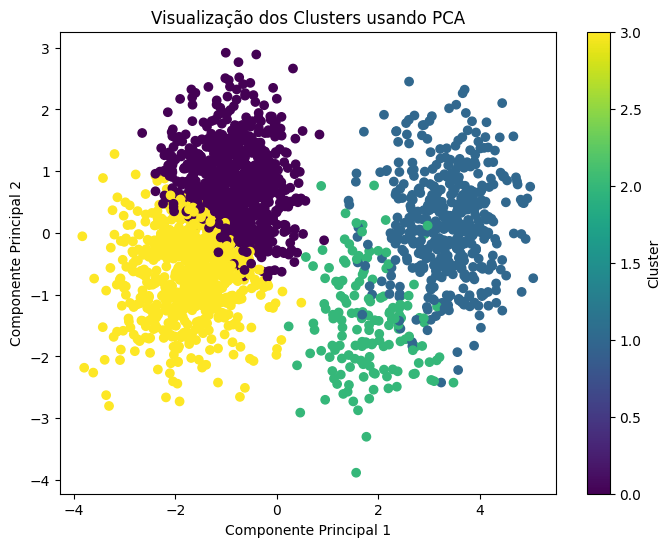

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzindo os dados para 2 dimensões com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criando o gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualização dos Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

## 7. Integrated Interpretation of Clustering Results and Pattern Analysis

Bringing together the findings from the K-Means clustering (K=4), the distribution of steroid use within each cluster, the characterization of cluster features through mean values, and the PCA visualization, we can now provide a comprehensive interpretation of the physiological and behavioral patterns observed in this dataset.

As shown in the distribution analysis (cell `f1eca151`), the K-Means algorithm effectively separated individuals into two primary groups based on steroid use status, despite being an unsupervised method:

*   **Non-User Clusters (0 and 3):** These clusters predominantly contain individuals who do not use anabolic steroids.
*   **User Clusters (1 and 2):** These clusters predominantly contain individuals who do use anabolic steroids.

This clear separation is a strong indicator that the physiological and behavioral features in the dataset contain significant discriminatory information related to steroid use. The formation of two non-user clusters and two user clusters suggests the presence of distinct sub-patterns within these broader categories.

To understand what drives these distinctions and defines each cluster's profile, we examine the mean characteristics of each cluster (cell `1ed02759`):

**Cluster 0 (Predominantly Non-Users):** Analyze the mean values for this cluster. What are the typical ranges for `age`, `heart_rate`, blood pressure, body composition metrics, `cholesterol`, and `testosterone_level`? Compare these to the overall dataset means and other clusters. This cluster likely represents a baseline non-user profile with typical physiological markers.

**Cluster 3 (Predominantly Non-Users):** Analyze the mean values for Cluster 3. How does this cluster differ from Cluster 0? Are there subtle variations in age, body composition, or cardiovascular metrics? Identifying these differences helps understand the variability within the non-user population as captured by the clustering.

**Cluster 1 (Predominantly Users):** Examine the mean characteristics of Cluster 1. How do the means of key variables like `testosterone_level`, `lean_mass_index`, `body_fat`, and `cholesterol` compare to the non-user clusters (0 and 3)? This cluster likely represents a specific profile of steroid users, potentially characterized by certain combinations of elevated testosterone (due to exogenous use) and altered body composition/health markers.

**Cluster 2 (Predominantly Users):** Analyze the mean characteristics of Cluster 2. How does this cluster differ from Cluster 1? Are there variations in the magnitude of certain metrics (e.g., even higher testosterone, different patterns in cholesterol or blood pressure)? This could indicate another distinct profile of steroid users, possibly related to different usage patterns, dosages, or individual responses.

**Influence of Key Features and Pattern Analysis:**

By comparing the mean values across all four clusters, we can identify the features that most significantly contribute to the observed separation:

*   **`testosterone_level`:** This variable is expected to show a marked difference, likely being significantly higher on average in the user clusters (1 and 2) compared to the non-user clusters (0 and 3), due to exogenous administration.
*   **`lean_mass_index` and `body_fat`:** Steroid use is often associated with increased muscle mass and decreased body fat. We would expect higher `lean_mass_index` and potentially lower `body_fat` in the user clusters compared to non-users.
*   **`cholesterol`:** Changes in cholesterol levels (e.g., lower HDL, higher LDL) are known side effects of steroid use. The user clusters may show different cholesterol profiles compared to non-users.
*   **Cardiovascular Metrics (`heart_rate`, `systolic_bp`, `diastolic_bp`):** Steroid use can impact cardiovascular health. Differences in these metrics between user and non-user clusters could highlight these effects.

The PCA visualization (cell `77aa71f2`) provides a visual confirmation of these patterns. The spatial separation of clusters in the PCA plot is driven by the principal components, which are linear combinations of the original features. The features identified as having significantly different means across user and non-user clusters are likely the ones contributing most strongly to the principal components that separate these groups in the PCA plot.

**Conclusion:**

The unsupervised K-Means clustering, combined with the analysis of steroid use distribution, cluster characteristics, and PCA visualization, strongly indicates that the physiological and behavioral features in this dataset contain clear patterns that differentiate anabolic steroid users from non-users. The analysis of cluster means highlights the specific variables (particularly `testosterone_level`, body composition, and potentially cardiovascular/cholesterol markers) that appear to be most influential in these distinctions. The presence of sub-clusters within both users and non-users suggests the possibility of identifying more granular profiles based on these features.